In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/5153 Kaggle

path = "./content/drive/MyDrive/5153 Kaggle/"

/content/drive/MyDrive/5153 Kaggle


In [3]:
# Install Packages

!pip install texthero
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 54.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.8 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528018 sha256=66e8a3e091a219929d1b3549eb8a3181728536aafd4ae551c29ed612943fa527
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [4]:
#Load Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#Import train and test dataset

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [6]:
# Print Train data info

print(train_data.head())
print("\n")
print(train_data.shape)
print("\n")
print(train_data.info())
print("\n")
print(train_data.describe()) #data summary
print("\n")

   Id                                               Text  Sentiment
0   0  American movies about war and Nazis simply can...          0
1   1  Who would have thought that a movie about a ma...          1
2   2  Well, as Goethe once said, there really isn't ...          0
3   3  Ever since I remember, I have loved airplanes ...          1
4   4  There are often badly-matched couples (in the ...          0


(24995, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24995 entries, 0 to 24994
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         24995 non-null  int64 
 1   Text       24995 non-null  object
 2   Sentiment  24995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 585.9+ KB
None


                 Id    Sentiment
count  24995.000000  24995.00000
mean   12497.000000      0.49994
std     7215.579325      0.50001
min        0.000000      0.00000
25%     6248.500000      0.00000
50%    12497.0000

In [7]:
# Print Test data info

print(test_data.head())
print("\n")
print(test_data.shape)
print("\n")
print(test_data.info())
print("\n")

   Id                                               Text
0   0  This is probably the best movie from director ...
1   1  It's particularly hard for a director to captu...
2   2  A very good movie about anti-semitism near the...
3   3  Interesting story and sympathetic treatment of...
4   4  There are films that are not released in theat...


(25865, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25865 entries, 0 to 25864
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      25865 non-null  int64 
 1   Text    25865 non-null  object
dtypes: int64(1), object(1)
memory usage: 404.3+ KB
None




0    12499
1    12496
Name: Sentiment, dtype: int64




<Axes: xlabel='Sentiment', ylabel='count'>

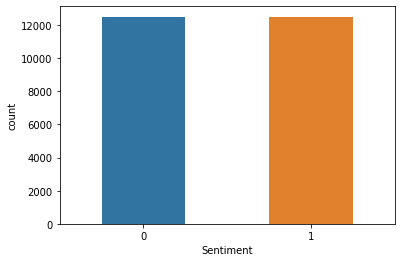

In [10]:
# Check whether data is balanced or imbalanced
print(train_data['Sentiment'].value_counts()) #It's a balanced dataset
print("\n")
sns.countplot(x=train_data.Sentiment,width = .5)

In [11]:
# Convert "Sentiment" column values. 0 = Negative and 1 = positive
def label_change(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Positive"
    
train_data['sentiment'] = train_data['Sentiment'].apply(lambda x: label_change(x))
print(train_data.head())
print("\n")

print(train_data['Sentiment'].value_counts())
print(train_data['sentiment'].value_counts())

   Id                                               Text  Sentiment sentiment
0   0  American movies about war and Nazis simply can...          0  Negative
1   1  Who would have thought that a movie about a ma...          1  Positive
2   2  Well, as Goethe once said, there really isn't ...          0  Negative
3   3  Ever since I remember, I have loved airplanes ...          1  Positive
4   4  There are often badly-matched couples (in the ...          0  Negative


0    12499
1    12496
Name: Sentiment, dtype: int64
Negative    12499
Positive    12496
Name: sentiment, dtype: int64


In [12]:
# Check the text data
train_data['Text'][0]

'American movies about war and Nazis simply cannot be good. They can not refrain from becoming idiot and following an agenda. All Nazis are bad, crazy, too proud, and Americans are so modest yet so capable and sensible and human. Come on, stop this bullshit. The main character says something like "by this trial, we have to make aggressive war a crime". Is America a peaceful nation with its world #1 $420 billion "defense" budget (#2 China with just $51b)? Is it simply spent in this without any... ROI? Why portray America as a peaceful nation when it isn\'t? I deeply dislike movies with an agenda - they throw art to hell and try to persuade us into believing something. Hollywood should put a label on movies, just as record companies have that "parental advisory" label. We should have a "bullshit advisory", "propaganda advisory" or a "politically correct advisory" label on some movies. This is one of them.'

In [ ]:
# Text Data Preprocessing

# clean the news content by using clean method from hero package
# train_data['Clean_Text'] = hero.clean(train_data['Text']) ##hero.clean contains seven functions



In [13]:
#create custom pipeline for cleaning text
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls,
                   hero.preprocessing.remove_diacritics,
                   hero.preprocessing.remove_digits,
                   hero.preprocessing.remove_punctuation,
                   hero.preprocessing.remove_stopwords,
                   hero.preprocessing.remove_round_brackets,
                   hero.preprocessing.remove_html_tags,
                   hero.preprocessing.remove_curly_brackets,
                   hero.preprocessing.remove_brackets,
                   ]


train_data['Clean_Text'] = train_data['Text'].pipe(hero.clean, custom_pipeline)

In [14]:
train_data[['Text', 'Clean_Text']].head()

,Text,Clean_Text
0,American movies about war and Nazis simply can...,american movies war nazis simply cannot goo...
1,Who would have thought that a movie about a ma...,would thought movie man drives couple ...
2,"Well, as Goethe once said, there really isn't ...",well goethe said really point trying ...
3,"Ever since I remember, I have loved airplanes ...",ever since remember loved airplanes flyin...
4,There are often badly-matched couples (in the ...,often badly matched couples general sense...


In [15]:
train_data['Clean_Text'][0]

'american movies  war  nazis simply cannot  good     refrain  becoming idiot  following  agenda   nazis  bad  crazy   proud   americans   modest yet  capable  sensible  human  come   stop  bullshit   main character says something like    trial     make aggressive war  crime   america  peaceful nation   world       billion  defense  budget    china    51b    simply spent   without   roi   portray america   peaceful nation       deeply dislike movies   agenda    throw art  hell  try  persuade us  believing something  hollywood  put  label  movies    record companies    parental advisory  label       bullshit advisory   propaganda advisory     politically correct advisory  label   movies    one   '

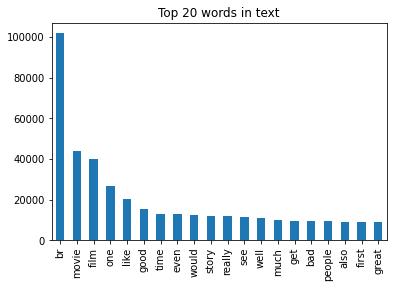

In [16]:
# Visualization

NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(train_data.loc[:, 'Clean_Text']).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=90, title="Top 20 words in text");
plt.show(block=True);

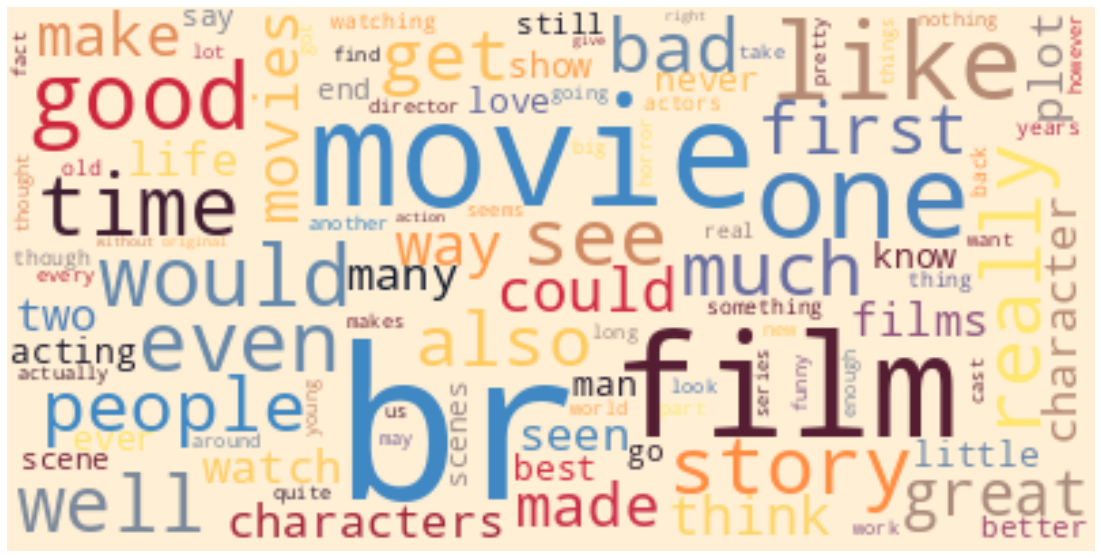

In [17]:
#Plot wordcloud image using WordCloud method
hero.wordcloud(train_data.loc[:, 'Clean_Text'], max_words=100)

In [18]:
#scatterplot
hero.scatterplot(train_data, 'Clean_Text')

In [19]:
# Create train_data copy
df = train_data
df.head()

,Id,Text,Sentiment,sentiment,Clean_Text
0,0,American movies about war and Nazis simply can...,0,Negative,american movies war nazis simply cannot goo...
1,1,Who would have thought that a movie about a ma...,1,Positive,would thought movie man drives couple ...
2,2,"Well, as Goethe once said, there really isn't ...",0,Negative,well goethe said really point trying ...
3,3,"Ever since I remember, I have loved airplanes ...",1,Positive,ever since remember loved airplanes flyin...
4,4,There are often badly-matched couples (in the ...,0,Negative,often badly matched couples general sense...


In [20]:
# Drop "ID" column
train_data = train_data[['Clean_Text', 'sentiment', 'Sentiment']]
train_data.head()

,Clean_Text,sentiment,Sentiment
0,american movies war nazis simply cannot goo...,Negative,0
1,would thought movie man drives couple ...,Positive,1
2,well goethe said really point trying ...,Negative,0
3,ever since remember loved airplanes flyin...,Positive,1
4,often badly matched couples general sense...,Negative,0


In [21]:
# Baseline model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df_train, df_val, train_labels, val_labels = train_test_split(train_data.Clean_Text, train_data.sentiment, test_size = 0.2, random_state = 123)


In [22]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train)
X_val = vectorizer.transform(df_val)

In [29]:
# Logistic Regression

lr_clf = LogisticRegression(max_iter=20000)
lr_clf.fit(X_train, train_labels)

LogisticRegression(max_iter=20000)

In [ ]:
lr_clf.score(X_val, val_labels) #evaluation

In [30]:
lr_clf_pred = lr_clf.predict(X_val) #prediction

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

print(accuracy_score(val_labels , lr_clf_pred))
print(confusion_matrix(val_labels , lr_clf_pred))
print(classification_report(val_labels , lr_clf_pred))


0.8845769153830766
[[2130  336]
 [ 241 2292]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      2466
    Positive       0.87      0.90      0.89      2533

    accuracy                           0.88      4999
   macro avg       0.89      0.88      0.88      4999
weighted avg       0.89      0.88      0.88      4999



In [51]:
test_data['Text']

0        This is probably the best movie from director ...
1        It's particularly hard for a director to captu...
2        A very good movie about anti-semitism near the...
3        Interesting story and sympathetic treatment of...
4        There are films that are not released in theat...
                               ...                        
25860    8/2008. When I originally wrote my comments, s...
25861    This movie is really bad, trying to create sci...
25862    It's a kinder, gentler Cyborg movie with a lov...
25863    Donald Pleasance and Peter Cushing united in o...
25864    I do not generally appreciate light-weight att...
Name: Text, Length: 25865, dtype: object

In [55]:
test_data["Sentiment"] = 0

X_test = vectorizer.transform(test_data['Text'])
test_pred = lr_clf.predict(X_test)

In [59]:
test_data["Sentiment"] = test_pred

In [60]:
mapping = {'Positive': 1, 'Negative': 0}
test_data["Sentiment"] = test_data["Sentiment"].map(mapping)
test_data.head()

,Id,Text,Sentiment
0,0,This is probably the best movie from director ...,1
1,1,It's particularly hard for a director to captu...,0
2,2,A very good movie about anti-semitism near the...,0
3,3,Interesting story and sympathetic treatment of...,1
4,4,There are films that are not released in theat...,0


In [63]:
result = test_data[['Id', 'Sentiment']]
result.to_csv('Submission_BaseModel.csv', index=False)